In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images to [0, 1] range
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # To create train/validation split if needed
)

# Load images and labels using ImageDataGenerator for train, validation, and test sets
train_generator = datagen.flow_from_directory(
    'train_data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'val_data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'test_data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 2870 images belonging to 3 classes.
Found 562 images belonging to 3 classes.
Found 572 images belonging to 3 classes.


Training with categorical_crossentropy loss
Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 575ms/step - accuracy: 0.5508 - loss: 0.9128 - val_accuracy: 0.8309 - val_loss: 0.4805
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.3881 - val_accuracy: 0.8333 - val_loss: 0.4894
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 572ms/step - accuracy: 0.8240 - loss: 0.4959 - val_accuracy: 0.8493 - val_loss: 0.4223
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.8750 - loss: 0.3254 - val_accuracy: 0.9444 - val_loss: 0.2154
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 47s 505ms/step - accuracy: 0.8532 - loss: 0.4452 - val_accuracy: 0.8676 - val_loss: 0.3635
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9563 - loss: 0.1895
Training with categorical_hinge loss
Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 536ms/step - accuracy: 0.8455 - loss: 0.3305 - val_accuracy: 0.8180 - val_loss: 0.3610
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.31

2024-09-01 23:17:00.592611: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 530ms/step - accuracy: 0.8498 - loss: 0.3017 - val_accuracy: 0.8290 - val_loss: 0.3423
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9622 - loss: 0.0752


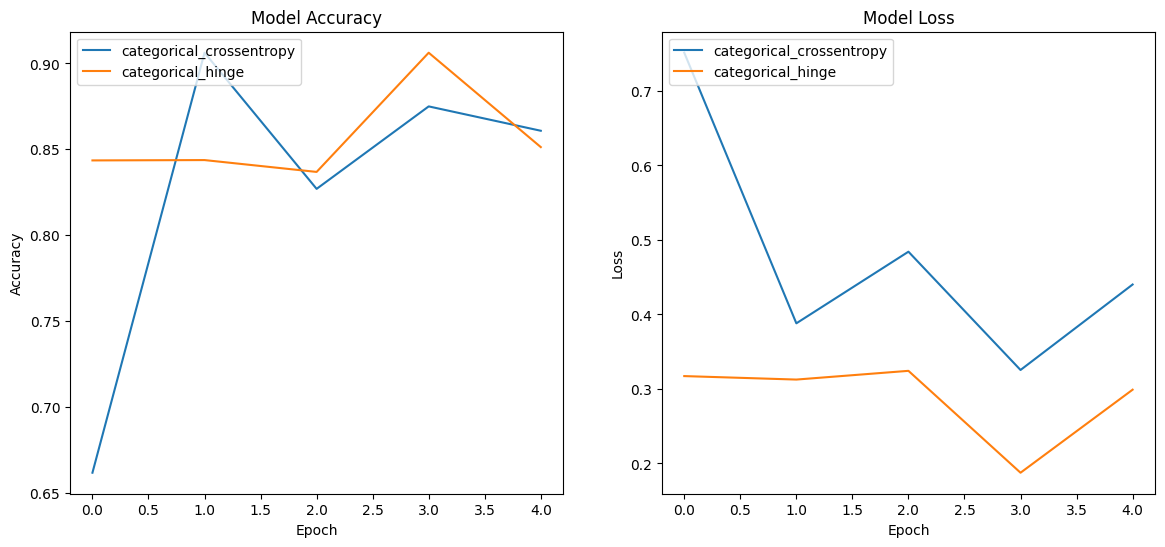

Loss Function: categorical_crossentropy
Test Loss: 0.2854
Test Accuracy: 93.57%
----------------------------------------
Loss Function: categorical_hinge
Test Loss: 0.1937
Test Accuracy: 90.26%
----------------------------------------


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential()

# Leaky ReLU activation function
leaky_relu = layers.LeakyReLU(alpha=0.01)  # alpha is the negative slope coefficient

# 1st Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation=leaky_relu, input_shape=(224, 224, 3))) 
# Input: (224, 224, 3), Output: (222, 222, 32)
# Explanation: 3x3 kernel reduces each dimension by 2, 32 filters increase depth.

# 1st Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) 
# Input: (222, 222, 32), Output: (111, 111, 32)
# Explanation: Max pooling reduces each dimension by half, depth remains the same.

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation=leaky_relu))
# Input: (111, 111, 32), Output: (109, 109, 64)
# Explanation: Kernel further reduces dimensions, and 64 filters increase depth.

# 2nd Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Input: (109, 109, 64), Output: (54, 54, 64)
# Explanation: Pooling reduces dimensions by half again.

# 3rd Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation=leaky_relu))
# Input: (54, 54, 64), Output: (52, 52, 128)
# Explanation: Kernel reduces spatial dimensions, 128 filters for richer features.

# 3rd Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Input: (52, 52, 128), Output: (26, 26, 128)
# Explanation: Pooling halves dimensions.

# 4th Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation=leaky_relu))
# Input: (26, 26, 128), Output: (24, 24, 128)

# 4th Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Input: (24, 24, 128), Output: (12, 12, 128)

# Flatten the output to feed into Dense layers
model.add(layers.Flatten()) 
# Input: (12, 12, 128), Output: (18432)
# Explanation: Flatten converts 3D output into 1D vector.

# Dense Fully Connected Layer
model.add(layers.Dense(512, activation=leaky_relu))
# Input: 18432, Output: 512
# Explanation: Fully connected layer reduces dimensionality to 512.

# Dropout Layer for regularization
model.add(layers.Dropout(0.5)) 
# Explanation: Dropout helps prevent overfitting by randomly turning off 50% of neurons.

# Output Layer
model.add(layers.Dense(3, activation='softmax'))
# Input: 512, Output: 3 (Number of classes)
# Explanation: Softmax for multi-class classification, outputs class probabilities.

# Define the number of epochs and steps per epoch
# Define the number of epochs and steps per epoch
# Define the number of epochs and steps per epoch
EPOCHS = 5

# Calculate the steps per epoch and validation steps
train_steps = train_generator.samples // BATCH_SIZE
val_steps = val_generator.samples // BATCH_SIZE
test_steps = test_generator.samples // BATCH_SIZE

# List to store history of different models
histories = []
loss_functions = ['categorical_crossentropy', 'categorical_hinge']
# loss_functions = ['sparse_categorical_crossentropy']

# Train and evaluate the model with different loss functions
for loss_function in loss_functions:
    print(f"Training with {loss_function} loss")
    
    # Compile the model with the current loss function
    model.compile(optimizer='adam',
                  loss=loss_function,
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=EPOCHS,
        validation_data=val_generator,
        validation_steps=val_steps
    )
    
    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
    
    # Store the history and test results
    histories.append({
        'loss_function': loss_function,
        'history': history,
        'test_loss': test_loss,
        'test_acc': test_acc
    })

# Plot training & validation accuracy values for each loss function
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for hist in histories:
    plt.plot(hist['history'].history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loss_functions, loc='upper left')

# Plot training & validation loss values for each loss function
plt.subplot(1, 2, 2)
for hist in histories:
    plt.plot(hist['history'].history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_functions, loc='upper left')

plt.show()

# Print test accuracy and loss for each model
for hist in histories:
    print(f"Loss Function: {hist['loss_function']}")
    print(f"Test Loss: {hist['test_loss']:.4f}")
    print(f"Test Accuracy: {hist['test_acc'] * 100:.2f}%")
    print("-" * 40)
